In [26]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [ ]:
# find AD which has no click through rate (CTR)
# goal is to maximize the reward

In [20]:
# import the dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv')
print(data)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

In [9]:
# random selection - to compare UCB results with random selection
n = 10000 # no of users i.e. no of iterations
ad_count = 10 # total no of advertisements
ads_selected = [] # list of selected advertisements for users
total_award = 0 # count of reward, increase the count if correct ad is selected.
for user_n in range(n):
    ad_no = random.randrange(ad_count)
    ads_selected.append(ad_no)
    total_award += data.values[user_n,ad_no]

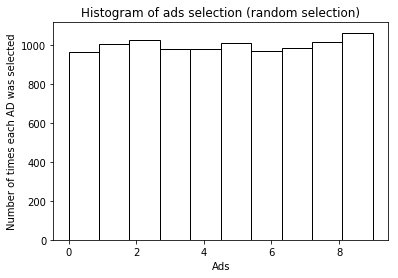

In [16]:
# Visualize the results
plt.hist(ads_selected, color = None, histtype = 'bar', fill=False)
plt.title('Histogram of ads selection (random selection)')
plt.xlabel('Ads')
plt.ylabel('Number of times each AD was selected')
plt.show()

In [53]:
# Implementing UCB
number_of_selections = [0] * ad_count
sums_of_rewards = [0] * ad_count
ads_selected = []
total_reward = 0

In [54]:
for user_n in range(n):
    selected_ad_at_n = 0
    max_upper_bound = 0
    reward = 0
    for ad in range(ad_count):
        if number_of_selections[ad] > 0:
            average_ad = sums_of_rewards[ad]/number_of_selections[ad]
            delta_ad = math.sqrt(3/2 * math.log(ad+1)/number_of_selections[ad])
            upper_bound = average_ad + delta_ad
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            selected_ad_at_n = ad
    reward = data.values[user_n,selected_ad_at_n]
    ads_selected.append(selected_ad_at_n)
    number_of_selections[selected_ad_at_n] += 1
    sums_of_rewards[selected_ad_at_n] += reward
total_reward = sum(sums_of_rewards)

In [55]:
print('Total reward:', total_reward)
print('The rewards are maximum for advertisement: ',sums_of_rewards.index(max(sums_of_rewards))+1)

Total reward: 2578
The rewards are maximum for advertisement:  5


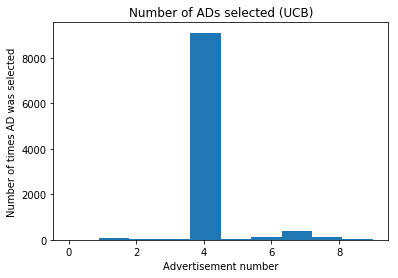

In [61]:
# Visualizing the results
plt.hist(ads_selected)
plt.title('Number of ADs selected (UCB)')
plt.xlabel('Advertisement number')
plt.ylabel('Number of times AD was selected')
plt.show()